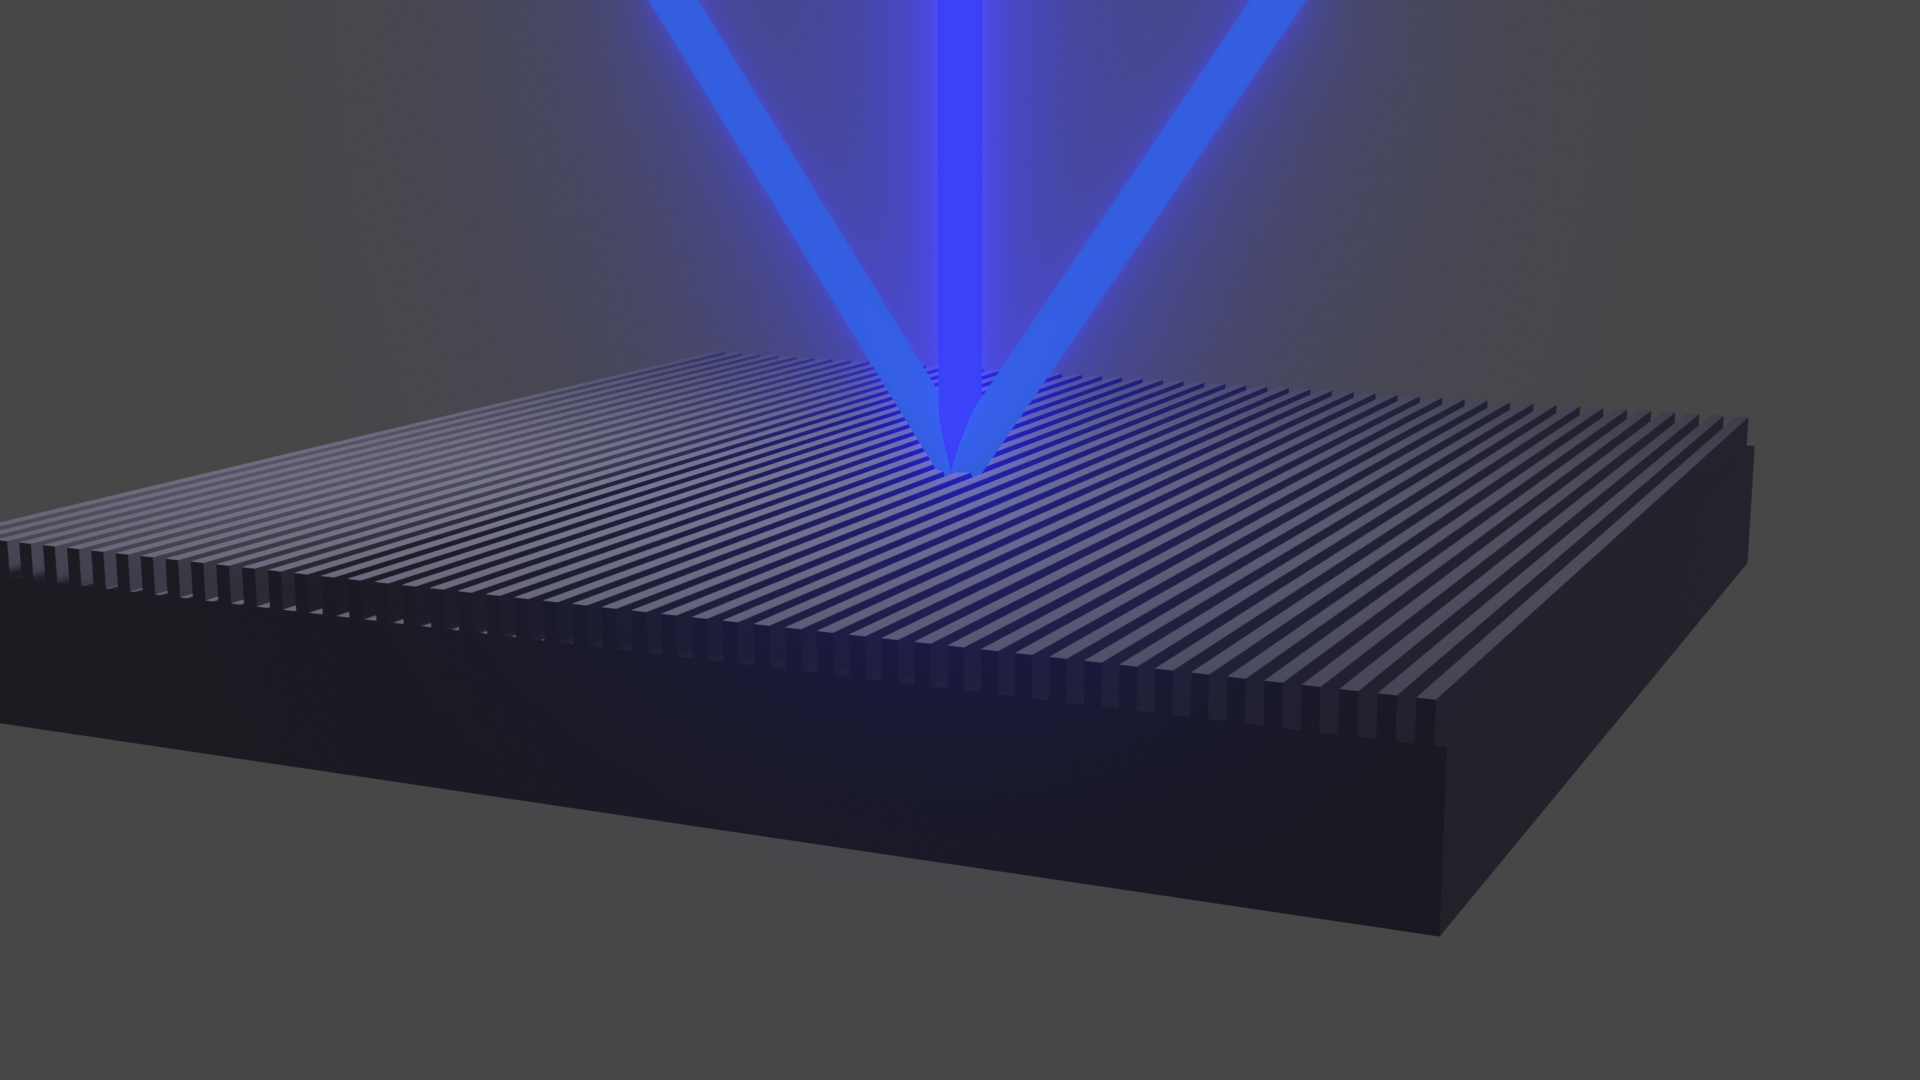

In [ ]:
#This is the main script for the simulation, from here you can set the parameters 
#of the simulation. The code requires all settings be input as a single value numpy
#array except whichever parameter you would like to change throughout a series of
#simulations. This changing paramater must be specified.




#When running on colab, these modules need to be installed at the start of any session
#once the first run has been completed, these lines can be #commented out to save time
!pip install rcwa==0.1.122
!pip install py_pol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 137 kB 4.2 MB/s 


Mounted at /content/drive/
Importing test context manager
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main/polarization.py:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if axis is 'x':


/content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main
sim30 /content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main

Simulating a Rectangular diffraction grating made of Aluminium....
sim80 /content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main
sim84 /content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main
Creating layers for rectangular simulation with vertical sidewalls...

grating material = aluminium
0.0
/content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main
sim91 /content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main
Performing simulation trial 1 of 2, with depthF=0.1...
This simulation requires 1 layers... 
creating layer 1 of 1...
There are 1 Layers of thickness 0.04050000000000001
Running simulation...

Total Reflection 0.7997081697544005
Plotting...


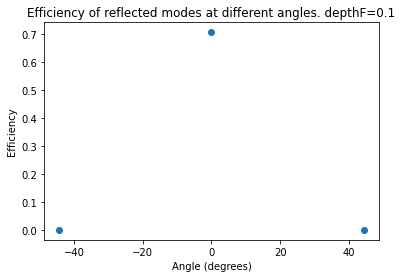

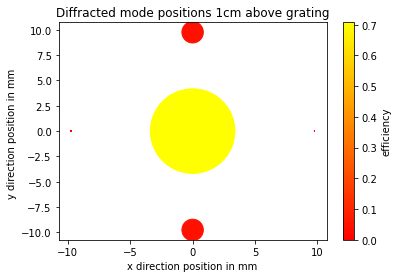

Performing simulation trial 2 of 2, with depthF=0.25...
This simulation requires 1 layers... 
creating layer 1 of 1...
There are 1 Layers of thickness 0.10125
Running simulation...

Total Reflection 0.8316554803964008
Plotting...


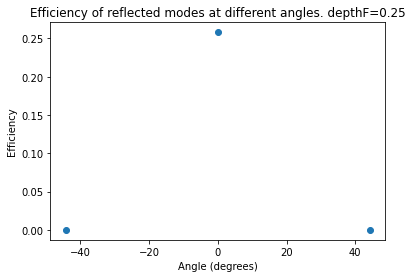

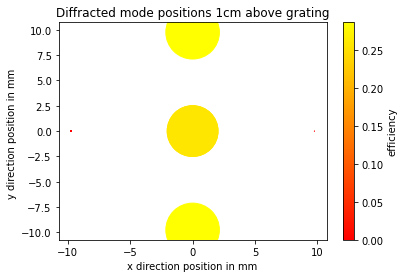

0

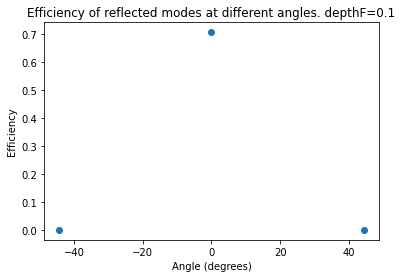

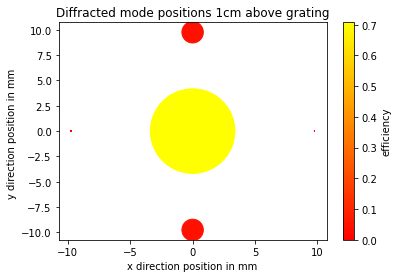

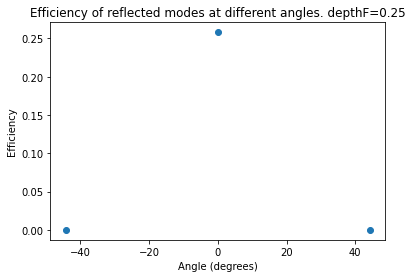

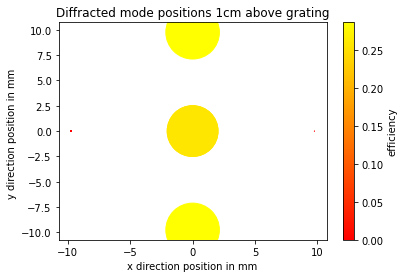

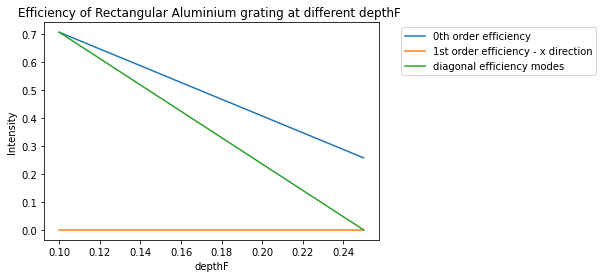

In [2]:

#Allows notebook to access other files within drive
from google.colab import drive
drive.mount('/content/drive/') #This will require you enter passcode to access your drive
import sys

#Path to import extra modules from may need changing to match the path within your drive
path='/content/drive/My Drive/FIB 4 FAB/rcwa simulation package/main'
#path='/content/drive/Shared with me/FIB 4 FAB/rcwa simulation package/main'
#path='Shared with me/FIB 4 FAB/rcwa simulation package/main'
#path='rcwa simulation package/main'

sys.path.insert(0,f'{path}')

#Additional modules that RCWA code requires
import context
import matplotlib.pyplot as plt
import unittest
from shorthand import *
from matrices import *
from source import Source
from layer import Layer
from solver import *
#Modules I've created
from slopecsv import Slopecsv
from checkcsv import *
from profileMkr import makeProf
from simulate import sim


#Settings for simulation
#Input parameters for simulation, all quantities should have one value only 
#except the quantity you'd like to test multiple of, which you must specify with
#the 'loop' variable


gType='Rectangular' #grating shape, choose from:
#'Rectangular' or 'CoatedChecker' or 'Square' or 'Blazed' 
#or 'CheckDiag' or 'CheckDiagErr' or 'Circ'

loop='depthF' #the variable you would like to test over multiple values, chosen from below
#(ie. 'depthF', 'slope', 'res' etc)

material='Aluminium' #Material of grating chosen from 'Silicon', 'Silver', 'Gold' or 'Aluminium'
#(currently for sloped gratings, multiple layers of differing material not coded)



wavelength = np.array([0.405]) #choose wavelength(s) for light source in microns
period=np.array([0.58]) #choose the grating period(s) in microns
har=np.array([19]) #Number of harmonics to caluculate (more -> better accuracy, recommend > 10*period/wavelength, odd)
res=np.array([100]) #'Resolution' of simulation, csv file(s) which define shape of grating will be res x res in dimension
slope=np.array([90]) #Slope(s) (in degrees), measured relative to the horizontal, should be 90 for checkerboard grating
#as functionality for sloped checkerboard not coded yet
depthF=np.array([0.1,0.25]) #depth of grating as fraction of wavelength


profile=False #would you like a plot of the profile displayed/saved? (only available 
#for rectangular grating currently)

#light source direction
theta =0 * deg
phi = 0*deg
#pTEM=1/sqrt(2)*complexArray([1,1j])
pTEM=[0,1]



if gType != "Blazed":
  slope=90*np.ones((np.shape(slope)))-slope

if (gType=='CheckDiag' or gType=='CoatedChecker' or gType == 'CheckDiagErr') and res[0]%2==0:
  res[0]=res[0]+1

print(path)

sim(gType,depthF,slope,profile,wavelength,period,har,res,material,theta,phi,pTEM,loop, path)







In [ ]:
#Testing code, please ignore


yimport numpy as np

axis='x'
clock=False
angle = np.pi/2
vec=np.array([0,1+1j,1j])
if axis is 'x':
  if clock:
    angle=2*np.pi-angle
  mat=np.array([1, 0, 0, 0, np.cos(angle), -1*np.sin(angle), 0,np.sin(angle),np.cos(angle)])
  mat=mat.reshape(3,3)
  jones=mat.dot(vec)
  print(jones)

In [ ]:
import numpy as np
a=1+1j
print(np.abs(a))
print(np.sqrt(2))


1.4142135623730951
1.4142135623730951


In [ ]:
import numpy as np
from py_pol import *
from py_pol.stokes import Stokes, create_Stokes, degrees
from py_pol.jones_vector import Jones_vector, create_Jones_vectors

j0=Jones_vector('test')
j0.from_components(np.array([1+3j]),np.array([-2+2e-4j]))
s0=Stokes('stoked')
s0.from_Jones(j0)

stoked = 
[+14.000 ]   
[+6.000 ]   
[-3.999 ]   
[+12.000 ]   

In [ ]:
a=0.30932690920361144+0.008512038957326816j
Ey=np.real(a)+np.imag(a)*1j
print(type(a))

<class 'complex'>


In [ ]:
a=np.array([1+1j,2+3j])
print(type(complex(a[0,0])))

IndexError: ignored